<a href="https://colab.research.google.com/github/nedokormysh/lin_models_presentation/blob/eda_streamlit/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Условие



**Требования к первому этапу проектного задания**
* построены графики распределений числовых признаков (не менее, чем по двум признакам)
* построена матрица корреляций
* построены графиков зависимостей целевой переменной и признаков (не менее, чем два графика)
* вычислены числовые характеристики распределения числовых столбцов (среднее, min, max, медиана и так далее)
* вычислены числовые характеристики категориальных столбцов
отображено число пропусков, дубликатов в данных
сделаны дополнительные исследования

**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

In [1]:
# from PIL import Image
# import requests
# from io import BytesIO

# url = 'https://github.com/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_5/data/image.png'
# url = 'https://github.com/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/939008dc2fb258039dfd0a5f11284c8434cf8cb1/data/image.png'

# response = requests.get(url)
# img = Image.open(BytesIO(response.content))

# img.show()

# Агрегация данных

In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PATH = 'https://raw.githubusercontent.com/aiedu-courses/stepik_linear_models/main/datasets/'

In [4]:
DATASETS_NAMES = ['D_clients.csv', 'D_close_loan.csv', 'D_job.csv', 'D_last_credit.csv', 'D_loan.csv', 'D_pens.csv', 'D_salary.csv', 'D_target.csv', 'D_work.csv']

In [5]:
# datasets = [re.sub(r'D_', '', i) for i in DATASETS_NAMES]
# datasets = [re.sub(r'.csv', '', i) for i in datasets]
# datasets

In [6]:
clients, close_loan, job, last_credit, loan, pens, salary, target, work = [pd.read_csv(PATH+f'{i}') for i in DATASETS_NAMES]

datasets = [clients, close_loan, job, last_credit, loan, pens, salary, target, work]

In [7]:
df_dict = {}

for i in range(len(DATASETS_NAMES)):
    name = re.sub(r'D_', '', DATASETS_NAMES[i].split('.')[0])
    df_dict[name] = datasets[i]
# df_dict

In [8]:
df_origin_table = pd.DataFrame(columns=['Название датасета', 'Количество дублей', 'Количество пропусков (сумма по всем колонкам)'])
# df_origin_table

In [9]:
# df_origin_table.loc[len(df_origin_table.index)] = [89, 93]
# df_origin_table

In [10]:
for i in range(len(datasets)):
    name = re.sub(r'D_', '', DATASETS_NAMES[i].split('.')[0])
    # print(DATASETS_NAMES[i].split('.')[0])
    empty = datasets[i].isna().any().any()
    if empty == True:
          empty = datasets[i].isna().sum().sum()

    duplicates = datasets[i].duplicated().sum()
    df_origin_table.loc[len(df_origin_table.index)] = name, duplicates, empty

In [11]:
# job.isna().sum()

In [12]:
df_origin_table

,Название датасета,Количество дублей,Количество пропусков (сумма по всем колонкам)
0,clients,0,0
1,close_loan,0,0
2,job,0,5469
3,last_credit,0,0
4,loan,0,0
5,pens,0,0
6,salary,300,0
7,target,0,0
8,work,0,0


Посмотрим на данные.

In [13]:
for i in range(len(datasets)):
    name = re.sub(r'D_', '', DATASETS_NAMES[i].split('.')[0])
    print(f'Датасет: \033[1m{name}\n')
    display(datasets[i].sample(2)) if len(datasets[i]) <= 2 else display(datasets[i].sample(3))
    print('\n')
    display(datasets[i].nunique())
    print(f'\nРазмер датасета: {len(datasets[i])}')
    print('Есть пропуски!') if datasets[i].isna().any().any() else print('Пропусков нет')
    print('-'*100)
    print('\n')

Датасет: clients



,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
3257,106810522,33,1,Неоконченное высшее,Разведен(а),1,1,1,0,Свердловская область,Свердловская область,Свердловская область,0,0
13747,106804816,32,0,Среднее,Состою в браке,3,3,1,0,Курганская область,Курганская область,Курганская область,0,0
2901,106804450,35,1,Высшее,Не состоял в браке,0,0,1,0,Архангельская область,Санкт-Петербург,Санкт-Петербург,0,0


ID                         16000
AGE                           47
GENDER                         2
EDUCATION                      7
MARITAL_STATUS                 5
CHILD_TOTAL                   10
DEPENDANTS                     8
SOCSTATUS_WORK_FL              2
SOCSTATUS_PENS_FL              2
REG_ADDRESS_PROVINCE          81
FACT_ADDRESS_PROVINCE         81
POSTAL_ADDRESS_PROVINCE       80
FL_PRESENCE_FL                 2
OWN_AUTO                       3
dtype: int64


Размер датасета: 16000
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: close_loan



,ID_LOAN,CLOSED_FL
4507,1753795165,0
6218,1753796876,1
2763,1753793421,0


ID_LOAN      21126
CLOSED_FL        2
dtype: int64


Размер датасета: 21126
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: job



,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,WORK_TIME,ID_CLIENT
14799,Строительство,Рабочий,Участие в основ. деятельности,36.0,106819169
10937,Металлургия/Промышленность/Машиностроение,Специалист,Участие в основ. деятельности,135.0,106815307
3357,Металлургия/Промышленность/Машиностроение,Высококвалифиц. специалист,Участие в основ. деятельности,72.0,106807727


GEN_INDUSTRY       31
GEN_TITLE          12
JOB_DIR            10
WORK_TIME         302
ID_CLIENT       15223
dtype: int64


Размер датасета: 15223
Есть пропуски!
----------------------------------------------------------------------------------------------------


Датасет: last_credit



,CREDIT,TERM,FST_PAYMENT,ID_CLIENT
2389,2850.0,4,3000.0,106806759
6761,27990.0,12,0.0,106811131
4180,6375.0,6,0.0,106808550


CREDIT          8029
TERM              22
FST_PAYMENT     2937
ID_CLIENT      15223
dtype: int64


Размер датасета: 15223
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: loan



,ID_LOAN,ID_CLIENT
1442,1753792100,106805740
14896,1753805554,106815896
12729,1753803387,106814827


ID_LOAN      21126
ID_CLIENT    15223
dtype: int64


Размер датасета: 21126
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: pens



,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


ID         2
FLAG       2
COMMENT    2
dtype: int64


Размер датасета: 2
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: salary



,FAMILY_INCOME,PERSONAL_INCOME,ID_CLIENT
8180,от 5000 до 10000 руб.,7000.0,106806917
14458,от 10000 до 20000 руб.,7800.0,106808548
846,от 20000 до 50000 руб.,20000.0,106819171


FAMILY_INCOME          5
PERSONAL_INCOME      274
ID_CLIENT          15223
dtype: int64


Размер датасета: 15523
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: target



,AGREEMENT_RK,ID_CLIENT,TARGET
13993,74534546,106818363,0
3497,61534793,106807867,0
11975,67228664,106816345,0


AGREEMENT_RK    15223
ID_CLIENT       15223
TARGET              2
dtype: int64


Размер датасета: 15223
Пропусков нет
----------------------------------------------------------------------------------------------------


Датасет: work



,ID,FLAG,COMMENT
2,3,2,не известно
1,2,1,не работает
0,1,0,работает


ID         3
FLAG       3
COMMENT    3
dtype: int64


Размер датасета: 3
Пропусков нет
----------------------------------------------------------------------------------------------------




Необходимо соединить данные по ключам. Большая часть данных у нас имеют общим ключом ID сlient. У нас 1600 клиентов в таблице client. Заменим ID На ID client.

И часть данных нужно объединять по ключу ID_LOAN. Начнём с этого этапа.

### LOAN

Разберёмся с займами. Объединим таблицу кредитов с закрытыми кредитами. Из таблицы закрытых кредитов получим количество. А также просуммируем количество кредитов, которое брал каждый клиент.

In [14]:
all_loan = loan.copy()

In [15]:
all_loan  = all_loan.merge(close_loan, on="ID_LOAN", how="inner")
all_loan.head()

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1


Рассмотрим сколько всего кредитов и сколько закрытых кредитов у каждого клиента.

In [16]:
all_loan = all_loan.groupby("ID_CLIENT").agg({"ID_LOAN": "count", "CLOSED_FL": "sum"})
all_loan.head()
all_loan.rename(columns={'ID_LOAN': 'LOAN_AMOUNT', 'CLOSED_FL': 'CLOSED_LOANS'}, inplace=True);

### CLIENT

Составим общую таблицу по клиентам

In [17]:
all_data = clients.copy()
all_data.rename(columns={'ID': 'ID_CLIENT'}, inplace=True)

Добавим информацию в общий датасет. Сначала таргет, объединим через 'right'. Т.е. оставим только те объекты, для которых у нас есть информция о целевой переменной.

In [18]:
all_data = all_data.merge(target, on='ID_CLIENT', how='right') # таргет.
all_data = all_data.merge(job, on="ID_CLIENT", how="left") # работа
all_data = all_data.merge(salary, on="ID_CLIENT", how="left") # зарплата
all_data = all_data.merge(all_loan, on='ID_CLIENT', how='left') # информация о кредитах
all_data = all_data.merge(last_credit, on="ID_CLIENT", how="left") # информация о последнем кредите

In [19]:
all_data.shape

(15523, 27)

In [20]:
all_data.head(3)

,ID_CLIENT,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,...,GEN_TITLE,JOB_DIR,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_AMOUNT,CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT
0,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,...,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0,1,1,8000.0,6,8650.0
1,106804370,49,1,Среднее специальное,Состою в браке,2,1,1,0,Оренбургская область,...,Рабочий,Вспомогательный техперсонал,18.0,от 10000 до 20000 руб.,5000.0,1,1,8000.0,6,8650.0
2,106804371,32,1,Среднее,Состою в браке,3,3,1,0,Кабардино-Балкария,...,Рабочий,Участие в основ. деятельности,97.0,от 10000 до 20000 руб.,12000.0,1,1,21650.0,6,4000.0


In [21]:
all_data = all_data[['ID_CLIENT', 'AGE', 'GENDER', 'EDUCATION', 'MARITAL_STATUS',
                     'CHILD_TOTAL', 'DEPENDANTS', 'SOCSTATUS_WORK_FL',
                     'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
                     'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
                     'FL_PRESENCE_FL', 'OWN_AUTO', 'AGREEMENT_RK',
                     'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'WORK_TIME',
                     'FAMILY_INCOME', 'PERSONAL_INCOME', 'LOAN_AMOUNT',
                     'CLOSED_LOANS', 'CREDIT', 'TERM', 'FST_PAYMENT', 'TARGET']]

# EDA

Удалим признаки, которые не помогут в обучении.

In [22]:
all_data.drop(columns=['ID_CLIENT', 'AGREEMENT_RK'], inplace=True)

Проверим дубликаты

In [23]:
all_data.duplicated().any()

True

In [24]:
all_data.drop_duplicates(inplace=True)

## Общая оценка

In [25]:
# all_data.info()

Посмотрим на распределения всех признаков.

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'GENDER'}>,
        <Axes: title={'center': 'CHILD_TOTAL'}>,
        <Axes: title={'center': 'DEPENDANTS'}>,
        <Axes: title={'center': 'SOCSTATUS_WORK_FL'}>],
       [<Axes: title={'center': 'SOCSTATUS_PENS_FL'}>,
        <Axes: title={'center': 'FL_PRESENCE_FL'}>,
        <Axes: title={'center': 'OWN_AUTO'}>,
        <Axes: title={'center': 'WORK_TIME'}>,
        <Axes: title={'center': 'PERSONAL_INCOME'}>],
       [<Axes: title={'center': 'LOAN_AMOUNT'}>,
        <Axes: title={'center': 'CLOSED_LOANS'}>,
        <Axes: title={'center': 'CREDIT'}>,
        <Axes: title={'center': 'TERM'}>,
        <Axes: title={'center': 'FST_PAYMENT'}>]], dtype=object)

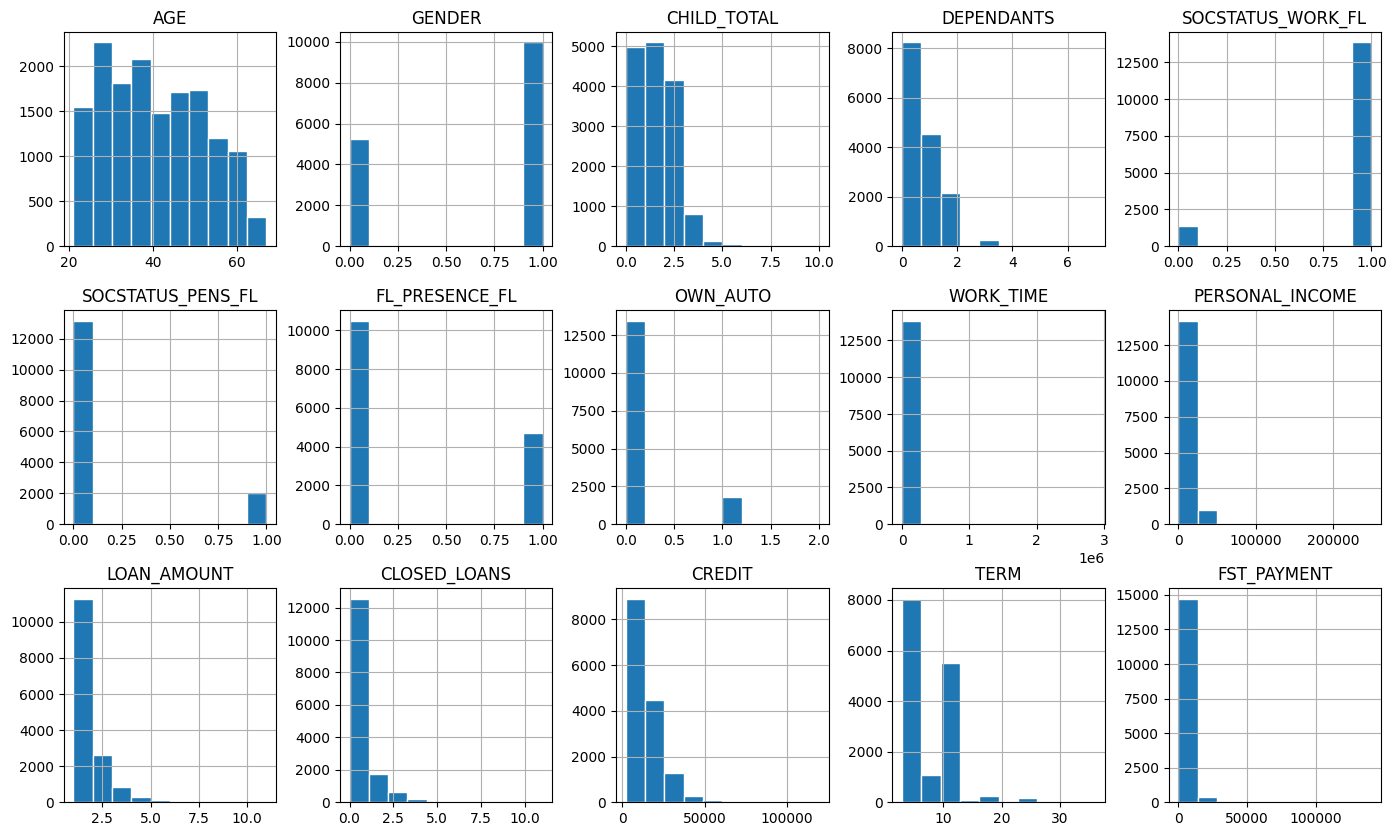

In [26]:
all_data.drop('TARGET', axis=1).hist(layout=(-1, 5), figsize=(17, 10), bins=10, edgecolor='w')

In [27]:
# sns.pairplot(all_data)

У нас есть признаки с непрерывным распределением и скорее категориальные признаки, закодированные числами. + в категориальных признаках есть географические признаки, выделим их также отдельно.

In [28]:
continuous_features = ['CREDIT', 'FST_PAYMENT', 'AGE', 'CHILD_TOTAL', 'DEPENDANTS',
                       'OWN_AUTO', 'PERSONAL_INCOME', 'WORK_TIME', 'CLOSED_LOANS', 'LOAN_AMOUNT']

categorical_features = [i for i in all_data.columns if i not in continuous_features and i != 'TARGET']

cat_feats = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'SOCSTATUS_WORK_FL',
             'SOCSTATUS_PENS_FL', 'FL_PRESENCE_FL', 'GEN_INDUSTRY', 'GEN_TITLE',
             'JOB_DIR', 'FAMILY_INCOME', 'TERM']

## Непрерывные величины

### Числовые характеристики распределения числовых столбцов
(среднее, min, max, медиана и так далее)

In [29]:
# all_data.describe(exclude=('object'))

In [30]:
all_data[continuous_features].describe()

,CREDIT,FST_PAYMENT,AGE,CHILD_TOTAL,DEPENDANTS,OWN_AUTO,PERSONAL_INCOME,WORK_TIME,CLOSED_LOANS,LOAN_AMOUNT
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.385500e+04,15223.000000,15223.000000
mean,14667.959345,3398.562655,40.406096,1.099389,0.645208,0.116337,13853.836323,2.922120e+02,0.751889,1.387769
std,12147.873496,5158.108934,11.601068,0.995411,0.812252,0.320844,9015.467617,2.436483e+04,0.988499,0.793566
min,2000.000000,0.000000,21.000000,0.000000,0.000000,0.000000,24.000000,1.000000e+00,0.000000,1.000000
25%,6500.000000,1000.000000,30.000000,0.000000,0.000000,0.000000,8000.000000,2.400000e+01,0.000000,1.000000
50%,11550.000000,2000.000000,39.000000,1.000000,0.000000,0.000000,12000.000000,4.800000e+01,0.000000,1.000000
75%,19170.000000,4000.000000,50.000000,2.000000,1.000000,0.000000,17000.000000,1.100000e+02,1.000000,2.000000
max,119700.000000,140000.000000,67.000000,10.000000,7.000000,2.000000,250000.000000,2.867959e+06,11.000000,11.000000


### WORK_TIME

Text(0.5, 0, 'WORK_TIME')

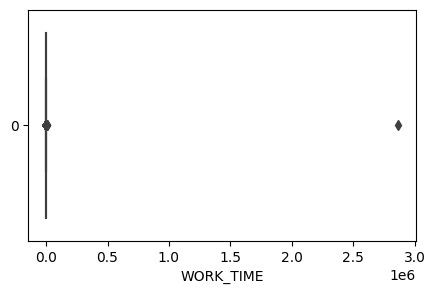

In [31]:
plt.figure(figsize=(5,3))
sns.boxplot(all_data['WORK_TIME'], orient='h')
plt.xlabel('WORK_TIME')

У нас есть какое-то слишком большое значение в колонке время работы. Посмотрим насколько это реалистичное значение.

In [32]:
all_data['WORK_TIME'].max()

2867959.0

Вероятно у нас какие-то ошибочные данные в месяцах. Предположим, что у нас не может человек находиться на работе больше, чем максимальный возраст участника. Добавим новую колонку с возрастом в годах.

In [33]:
all_data['WORK_TIME_IN_YEARS'] = all_data['WORK_TIME'] / 12

In [34]:
all_data['WORK_TIME_IN_YEARS'].describe()

count     13855.000000
mean         24.350998
std        2030.402702
min           0.083333
25%           2.000000
50%           4.000000
75%           9.166667
max      238996.583333
Name: WORK_TIME_IN_YEARS, dtype: float64

In [35]:
len(all_data[all_data['WORK_TIME_IN_YEARS'] > all_data['AGE'].max()])

11

Таких значений мало. Удалим их из нашей выборки.

In [36]:
all_data = all_data[all_data['WORK_TIME_IN_YEARS'] < all_data['AGE'].max()]

Также проверим, что количество лет на работе не превышало бы возраста самого человека.

In [37]:
len(all_data[all_data['AGE'] <= all_data['WORK_TIME_IN_YEARS']])

7

Таких данных тоже мало. Опять же удалим.

In [38]:
all_data = all_data[all_data['AGE'] > all_data['WORK_TIME_IN_YEARS']]

In [39]:
all_data['WORK_TIME_IN_YEARS'].describe()

count    13837.000000
mean         6.931368
std          7.584304
min          0.083333
25%          2.000000
50%          4.000000
75%          9.000000
max         60.833333
Name: WORK_TIME_IN_YEARS, dtype: float64

In [40]:
continuous_features.append('WORK_TIME_IN_YEARS')

In [41]:
all_data[all_data['WORK_TIME_IN_YEARS'] == all_data['WORK_TIME_IN_YEARS'].max()]

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,...,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_AMOUNT,CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT,TARGET,WORK_TIME_IN_YEARS
7872,62,1,Среднее,Состою в браке,1,0,1,1,Иркутская область,Иркутская область,...,730.0,от 10000 до 20000 руб.,13300.0,1,0,29500.0,6,9500.0,0,60.833333


У нас есть объекты, где возраст человека близок к годам на работе. Предположим, что у нас всё таки есть ограничение снизу. Выбрал возраст 14 лет некоторым перебором, который позволяет не исключать много объектов из дальнейшего рассмотрения.

In [42]:
len(all_data[all_data['AGE'] - 14 >= all_data['WORK_TIME_IN_YEARS']])

13819

In [43]:
all_data = all_data[all_data['AGE'] - 14 >= all_data['WORK_TIME_IN_YEARS']]

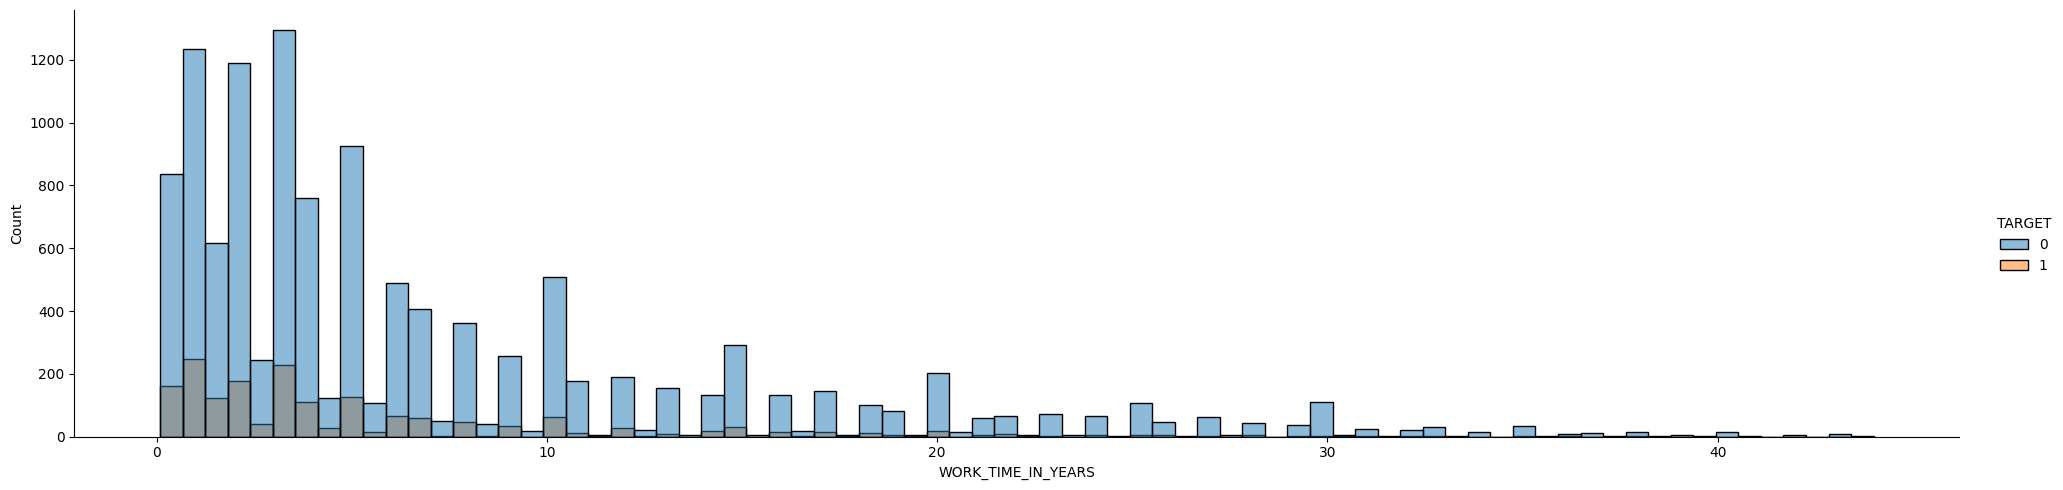

In [44]:
sns.displot(data=all_data,
            x=all_data['WORK_TIME_IN_YEARS'],
            legend=True,
            aspect=4,
            hue=all_data['TARGET'],
            kind='hist')

In [45]:
all_data[all_data['WORK_TIME_IN_YEARS'] == all_data['WORK_TIME_IN_YEARS'].max()]

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,...,WORK_TIME,FAMILY_INCOME,PERSONAL_INCOME,LOAN_AMOUNT,CLOSED_LOANS,CREDIT,TERM,FST_PAYMENT,TARGET,WORK_TIME_IN_YEARS
4213,61,1,Высшее,Не состоял в браке,2,0,1,0,Волгоградская область,Волгоградская область,...,528.0,от 10000 до 20000 руб.,16000.0,1,1,5999.0,3,15000.0,0,44.0
9730,65,1,Среднее,Не состоял в браке,0,0,1,0,Адыгея,Адыгея,...,528.0,от 10000 до 20000 руб.,10000.0,2,2,22194.0,10,3916.0,0,44.0


### PERSONAL_INCOME

<Axes: >

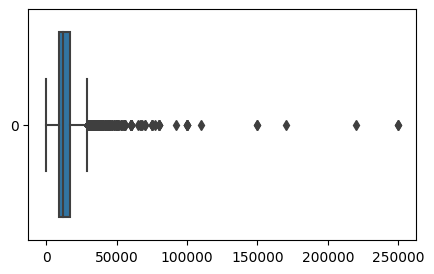

In [46]:
plt.figure(figsize=(5,3))
sns.boxplot(all_data['PERSONAL_INCOME'], orient='h')

250_000 не смущает, но вот нижний диапазон.

In [47]:
all_data = all_data[all_data['PERSONAL_INCOME'] > all_data['PERSONAL_INCOME'].quantile(0.001)]

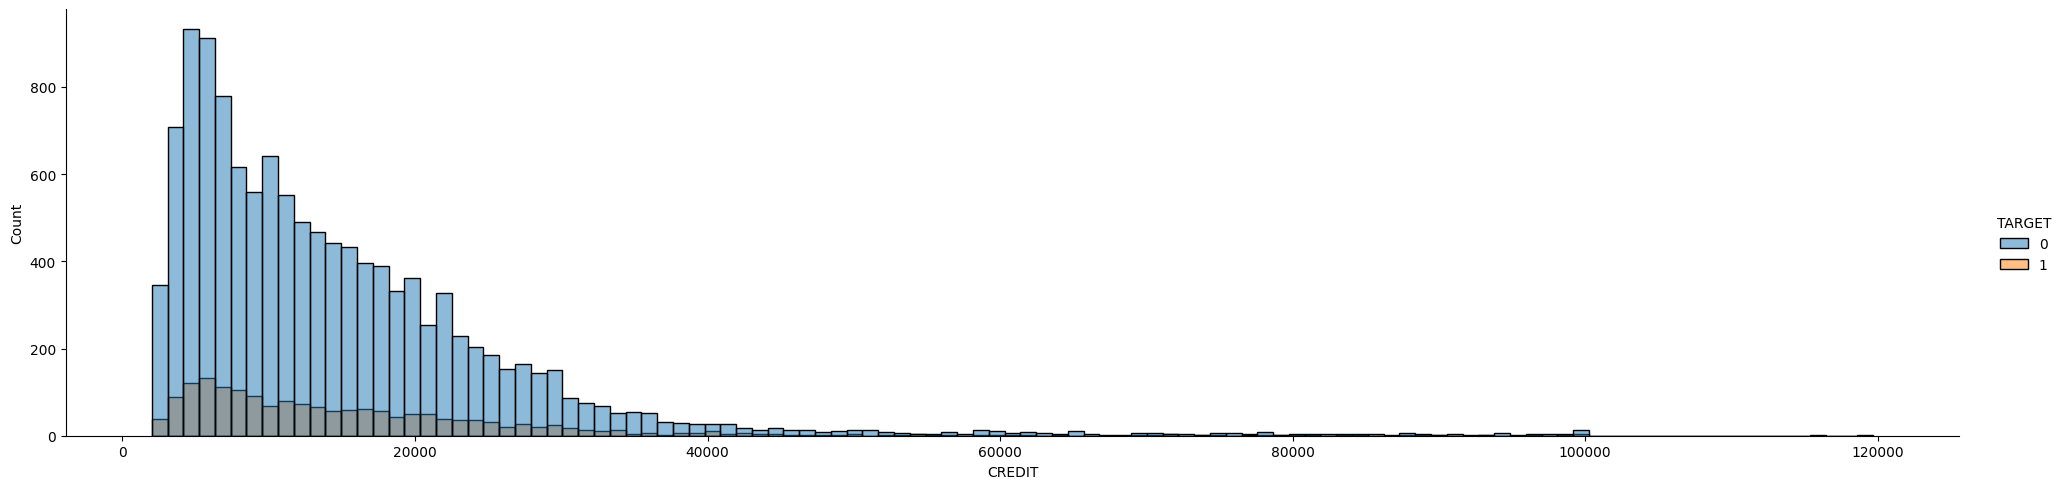

In [48]:
sns.displot(data=all_data,
            x=all_data['CREDIT'],
            legend=True,
            aspect=4,
            hue=all_data['TARGET'],
            kind='hist')

### CREDIT

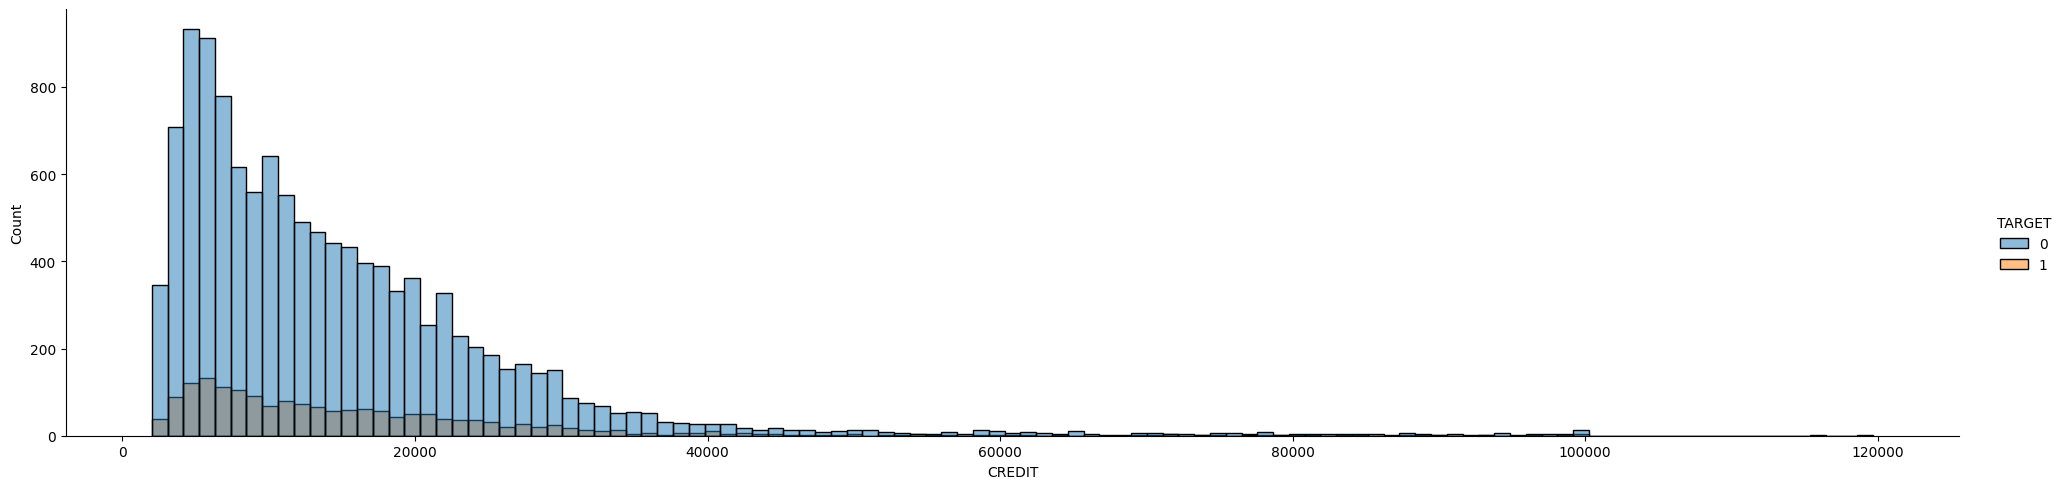

In [49]:
sns.displot(data=all_data,
            x=all_data['CREDIT'],
            legend=True,
            aspect=4,
            hue=all_data['TARGET'],
            kind='hist')

In [50]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 15522
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      13799 non-null  int64  
 1   GENDER                   13799 non-null  int64  
 2   EDUCATION                13799 non-null  object 
 3   MARITAL_STATUS           13799 non-null  object 
 4   CHILD_TOTAL              13799 non-null  int64  
 5   DEPENDANTS               13799 non-null  int64  
 6   SOCSTATUS_WORK_FL        13799 non-null  int64  
 7   SOCSTATUS_PENS_FL        13799 non-null  int64  
 8   REG_ADDRESS_PROVINCE     13799 non-null  object 
 9   FACT_ADDRESS_PROVINCE    13799 non-null  object 
 10  POSTAL_ADDRESS_PROVINCE  13799 non-null  object 
 11  FL_PRESENCE_FL           13799 non-null  int64  
 12  OWN_AUTO                 13799 non-null  int64  
 13  GEN_INDUSTRY             13799 non-null  object 
 14  GEN_TITLE             

### FST_PAYMENT

In [51]:
len(all_data[all_data['FST_PAYMENT'] > all_data['CREDIT']])

444

У нас в принципе есть ошибочные данные: сумма первого платежа превышает сумму кредита. И их очень много. Выбросить нельзя. Возможно перепутана сумма кредита и сумма первоначального платежа. Вероятно можно протестировать это уже при построении модели. Проверить точность модели без или с заменой этих значений. Либо опять же протестировать точность с выбросом модели и без.

Также просто посмотреть влияние этих признаков через shap. Возможно какой-то признак будет иметь ограниченное влияние.

Возможно я не совсем правильно осознаю пункт "первоначальный взнос". Может быть люди брали кредит и тут же его гасили исходя из каких-то скрытых целей (например, скидки на товар при оплате через кредит).

Но при EDA считаю, что у нас нет возможности (или я их не знаю) исключить данные или как-то по-другому их обрабатывать. Оставляю как есть.

Text(0.5, 0, 'FST_PAYMENT')

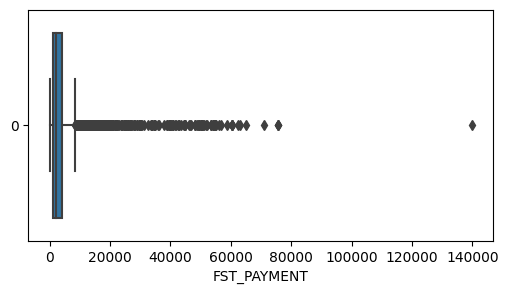

In [52]:
plt.figure(figsize=(6,3))
sns.boxplot(all_data['FST_PAYMENT'], orient='h')
plt.xlabel('FST_PAYMENT')

In [53]:
all_data['FST_PAYMENT'].min()

0.0

Конечно 1 значение сильно выбивается, но выбрасывать не решаюсь, т.к. вроде бы такое тоже возможно.

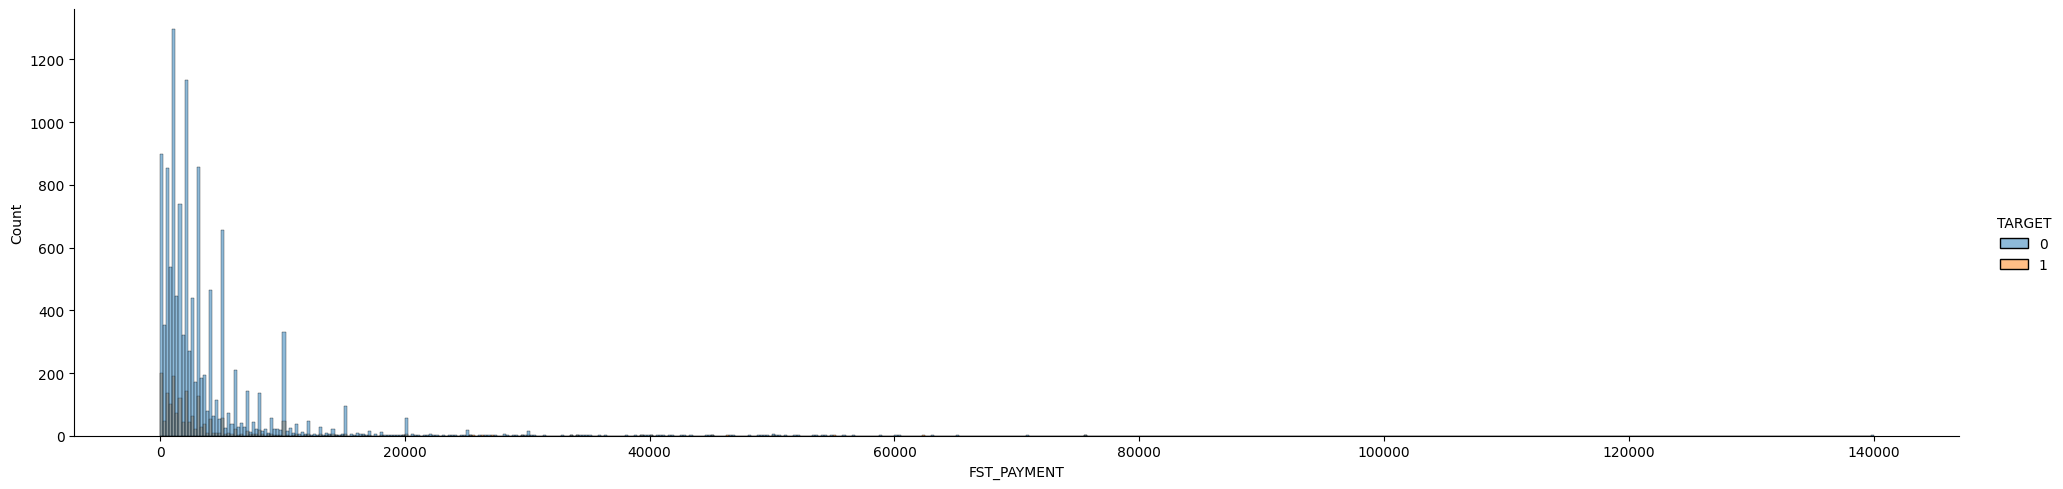

In [54]:
sns.displot(data=all_data,
            x=all_data['FST_PAYMENT'],
            legend=True,
            aspect=4,
            hue=all_data['TARGET'],
            kind='hist')

### AGE

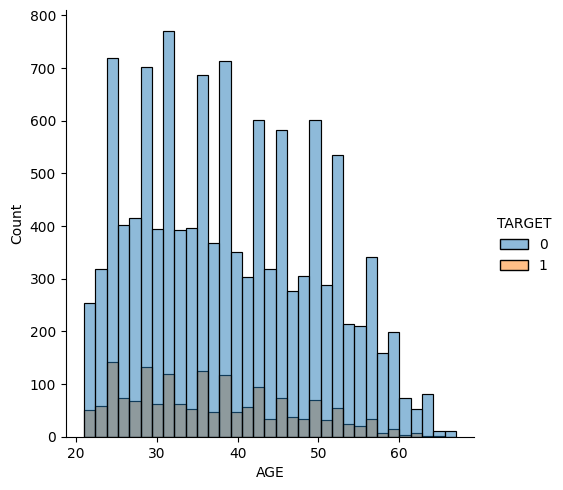

In [55]:
sns.displot(data=all_data,
            x=all_data['AGE'],
            legend=True,
            aspect=1,
            hue=all_data['TARGET'],
            kind='hist')

### CHILD_TOTAL

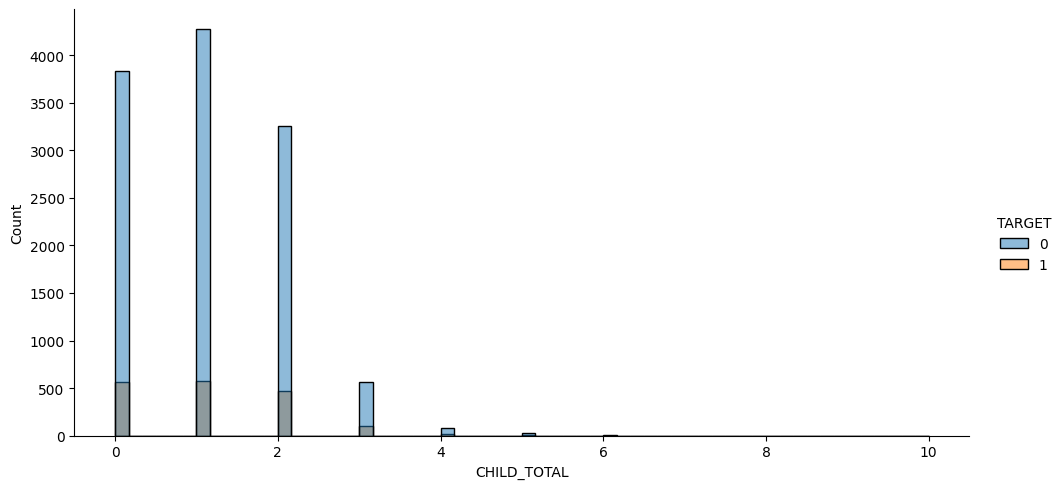

In [56]:
sns.displot(data=all_data,
            x=all_data['CHILD_TOTAL'],
            legend=True,
            aspect=2,
            hue=all_data['TARGET'],
            kind='hist')

### DEPENDANTS

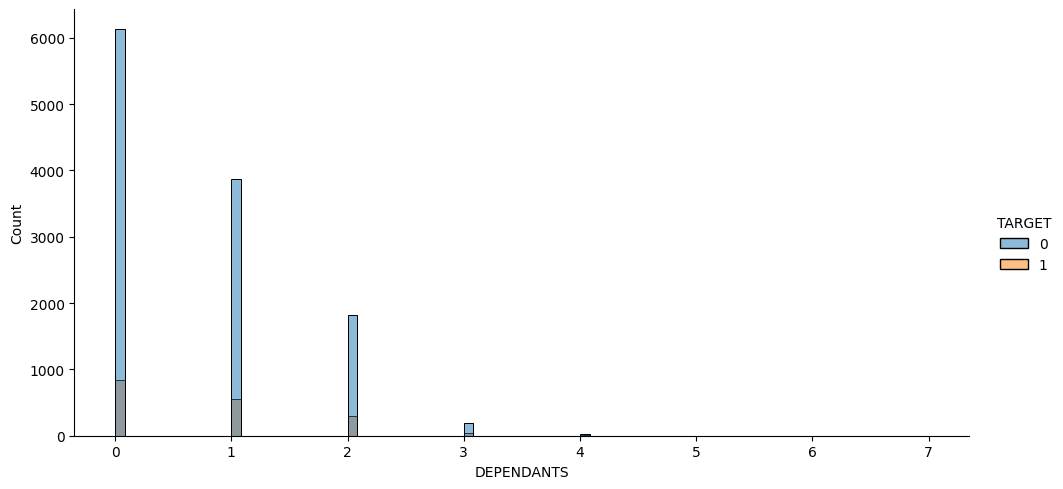

In [57]:
sns.displot(data=all_data,
            x=all_data['DEPENDANTS'],
            legend=True,
            aspect=2,
            hue=all_data['TARGET'],
            kind='hist')

### OWN_AUTO

In [58]:
all_data['OWN_AUTO'].unique()

array([0, 1, 2])

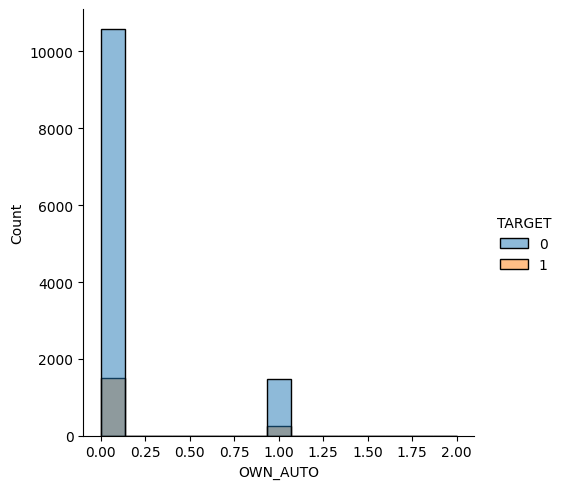

In [59]:
sns.displot(data=all_data,
            x=all_data['OWN_AUTO'],
            legend=True,
            aspect=1,
            hue=all_data['TARGET'],
            kind='hist')

### CLOSED_LOANS

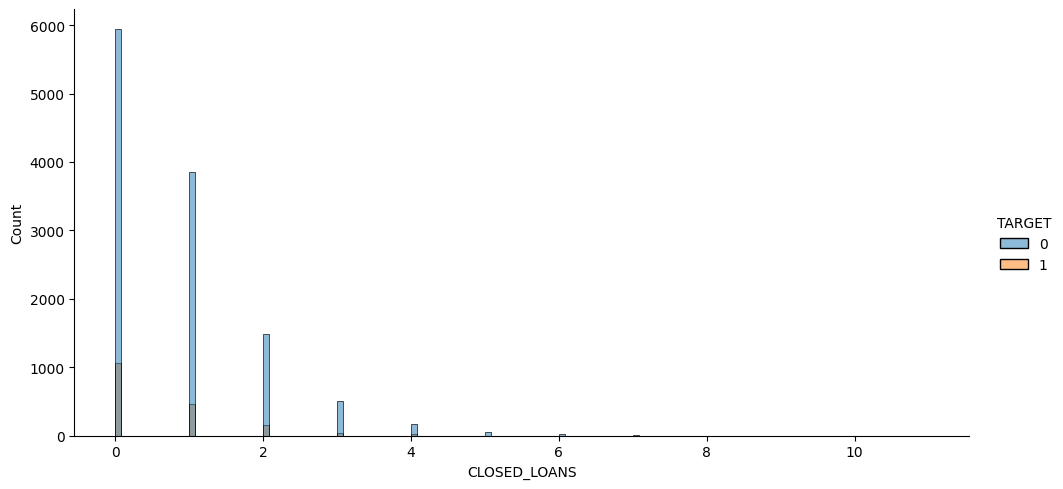

In [60]:
sns.displot(data=all_data,
            x=all_data['CLOSED_LOANS'],
            legend=True,
            aspect=2,
            hue=all_data['TARGET'],
            kind='hist')

### LOAN_AMOUNT

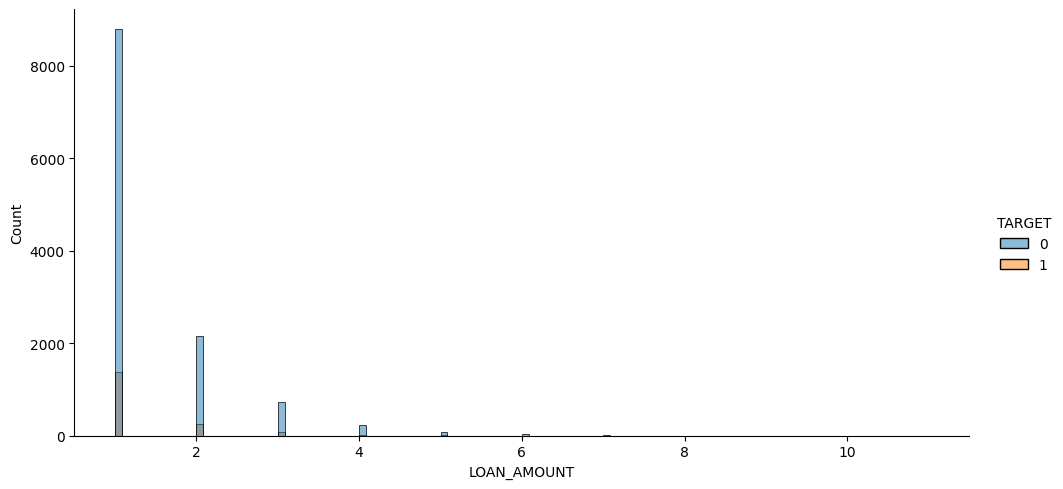

In [61]:
sns.displot(data=all_data,
            x=all_data['LOAN_AMOUNT'],
            legend=True,
            aspect=2,
            hue=all_data['TARGET'],
            kind='hist')

In [62]:
# continuous_features

## Категориальные переменные

Добавим столбец клиентов с кредитам сейчас. 1 - кредиты есть, 0 - кредитов сейчас нет.

In [63]:
all_data['LOAN_NOW'] = 0
all_data.loc[all_data['LOAN_AMOUNT'] - all_data['CLOSED_LOANS'] != 0, ['LOAN_NOW']] = 1

In [64]:
categorical_features.append('LOAN_NOW')
cat_feats.append('LOAN_NOW')

In [65]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 15522
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      13799 non-null  int64  
 1   GENDER                   13799 non-null  int64  
 2   EDUCATION                13799 non-null  object 
 3   MARITAL_STATUS           13799 non-null  object 
 4   CHILD_TOTAL              13799 non-null  int64  
 5   DEPENDANTS               13799 non-null  int64  
 6   SOCSTATUS_WORK_FL        13799 non-null  int64  
 7   SOCSTATUS_PENS_FL        13799 non-null  int64  
 8   REG_ADDRESS_PROVINCE     13799 non-null  object 
 9   FACT_ADDRESS_PROVINCE    13799 non-null  object 
 10  POSTAL_ADDRESS_PROVINCE  13799 non-null  object 
 11  FL_PRESENCE_FL           13799 non-null  int64  
 12  OWN_AUTO                 13799 non-null  int64  
 13  GEN_INDUSTRY             13799 non-null  object 
 14  GEN_TITLE             

Некоторые стобцы в нашем категориальном списке не являются categorial. Приведём к этому типу.

In [66]:
for el in categorical_features:
    all_data[el] = all_data[el].astype('category')

### Числовые характеристики категориальных столбцов

In [67]:
all_data.duplicated().any()

False

Дубликатов у нас нет.

In [68]:
all_data.describe(include='category')

,GENDER,EDUCATION,MARITAL_STATUS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,GEN_INDUSTRY,GEN_TITLE,JOB_DIR,FAMILY_INCOME,TERM,LOAN_NOW
count,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799,13799
unique,2,7,5,2,2,81,81,80,2,31,12,10,5,22,2
top,1,Среднее специальное,Состою в браке,1,0,Кемеровская область,Кемеровская область,Кемеровская область,0,Торговля,Специалист,Участие в основ. деятельности,от 10000 до 20000 руб.,6,1
freq,8818,5919,8582,13790,13124,607,607,607,9531,2374,6981,11407,6317,4585,8529


Создадим функцию для отображения характеристик категориальных столбцов.

In [69]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=True):

    print(f'Наличие пропусков: {all_data[feat].isna().any()}')

    if pie:
        all_data[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True, labels=labels).set(title=title)

    sns.displot(data=all_data,
                x=all_data[feat],
                legend=True,
                aspect=aspect,
                hue=all_data['TARGET'],
                kind='hist')

### LOAN_NOW

Наличие пропусков: False


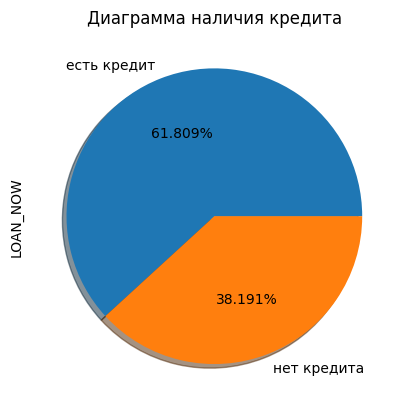

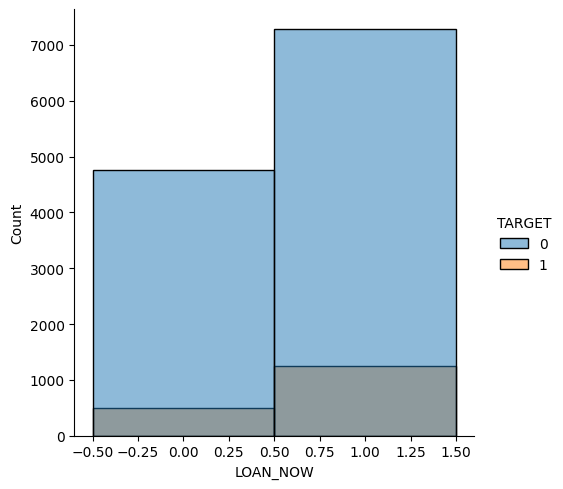

In [70]:
labels = ['есть кредит', 'нет кредита']
title = "Диаграмма наличия кредита"

show_cat_feat('LOAN_NOW', labels, title)

In [71]:
# fig = plt.figure(figsize=(10, 6))
# palette_color = sns.color_palette('bright')
# plt.pie(all_data['LOAN_NOW'].value_counts(), labels=labels, colors=palette_color, autopct='%.0f%%')

### GENDER

Наличие пропусков: False


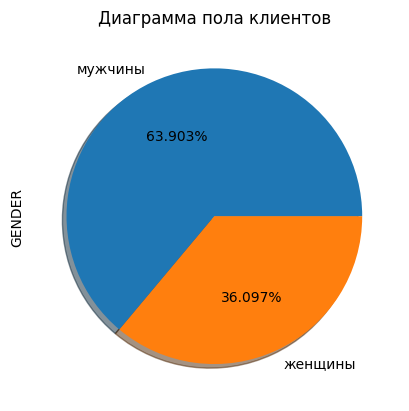

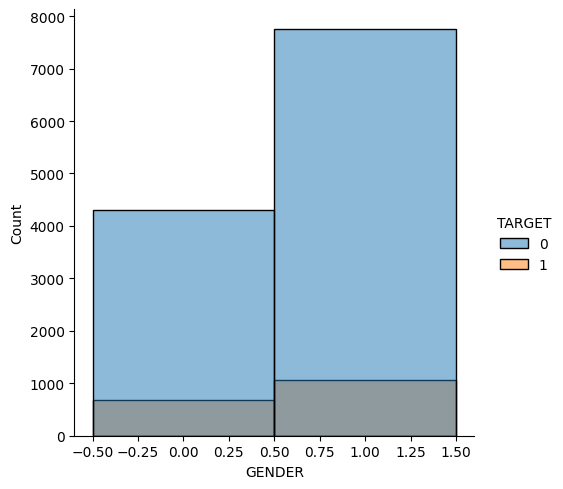

In [72]:
labels = ['мужчины', 'женщины']
title =  "Диаграмма пола клиентов"

show_cat_feat('GENDER', labels, title)

### EDUCATION

In [73]:
all_data['EDUCATION'].nunique()

7

Наличие пропусков: False


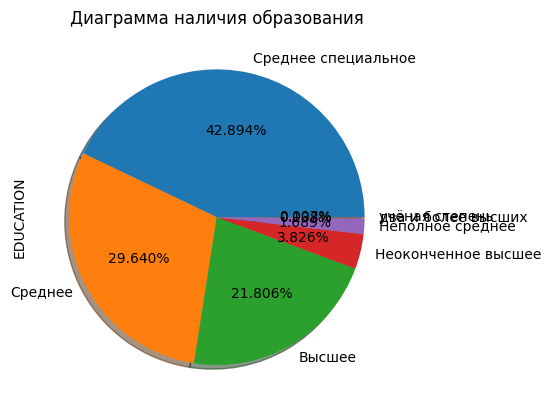

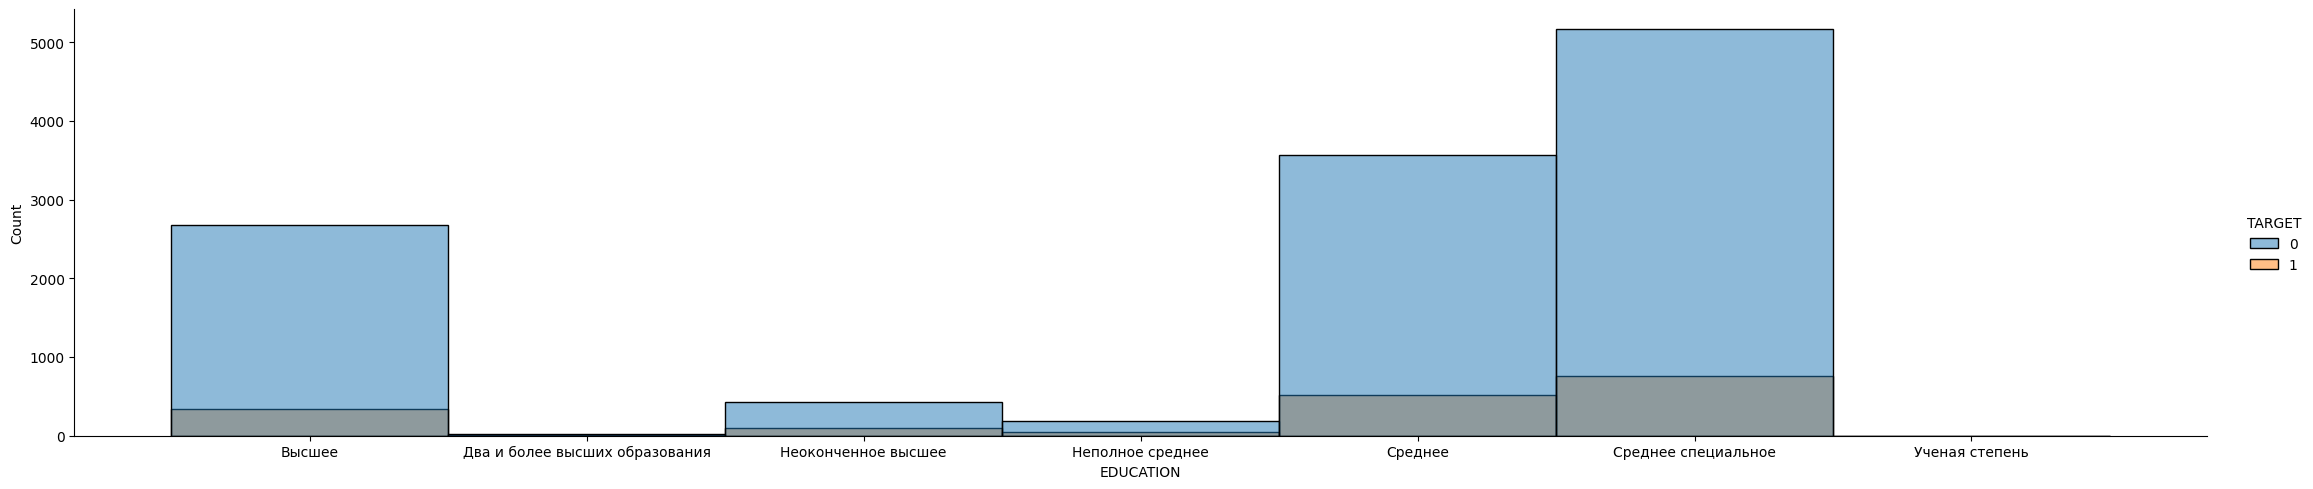

In [74]:
labels=['Среднее специальное', 'Среднее', 'Высшее',
        'Неоконченное высшее', 'Неполное среднее', 'два и более высших', 'учёная степень']

title='Диаграмма наличия образования'

show_cat_feat('EDUCATION', labels, title, 4.5)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Среднее специальное'),
  Text(1, 0, 'Среднее'),
  Text(2, 0, 'Неполное среднее'),
  Text(3, 0, 'Высшее'),
  Text(4, 0, 'Неоконченное высшее'),
  Text(5, 0, 'Два и более высших образования'),
  Text(6, 0, 'Ученая степень')])

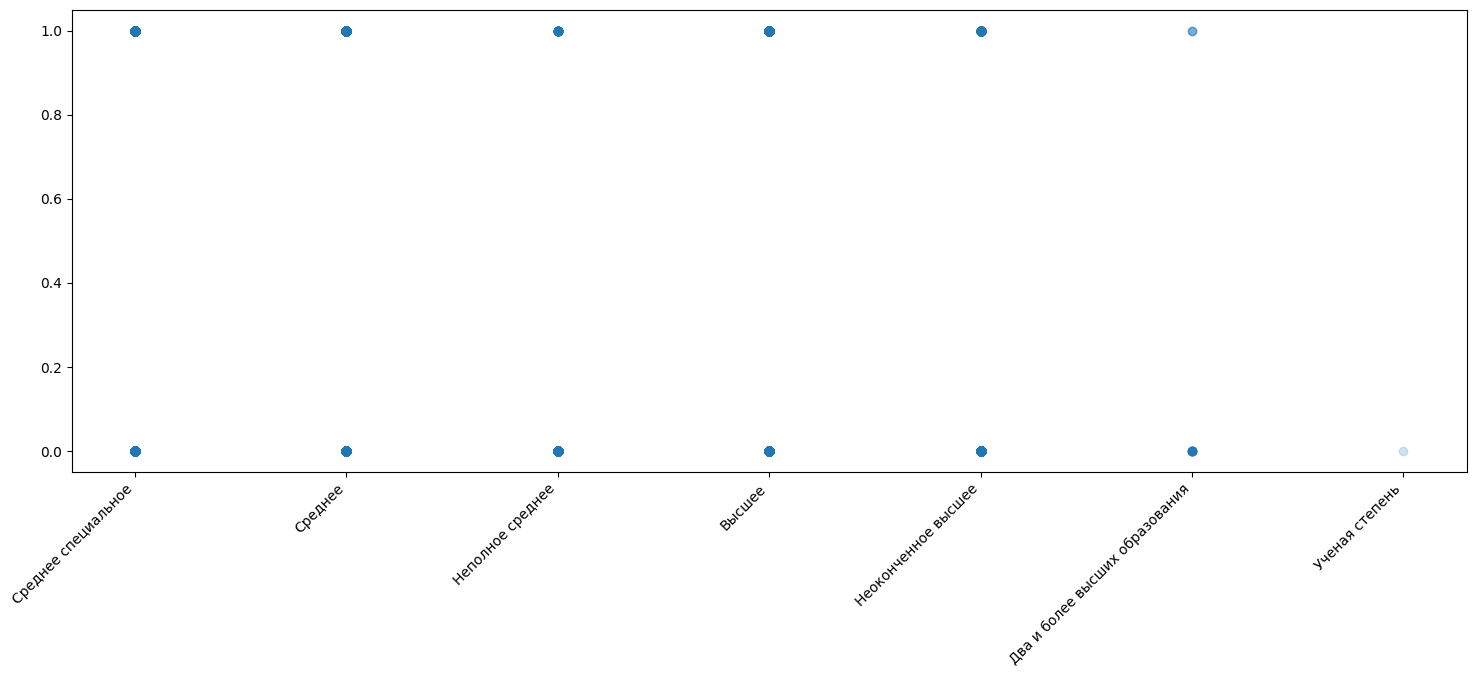

In [75]:
plt.subplots(figsize=(18, 6))
plt.scatter(all_data['EDUCATION'], all_data["TARGET"], alpha=0.2)
plt.xticks(rotation=45, ha='right')

С учёной степенью и двумя и большим количеством образования реже берут кредиты.

### MARITAL_STATUS

Наличие пропусков: False


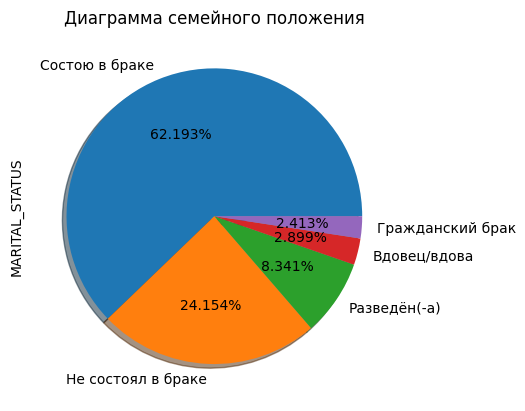

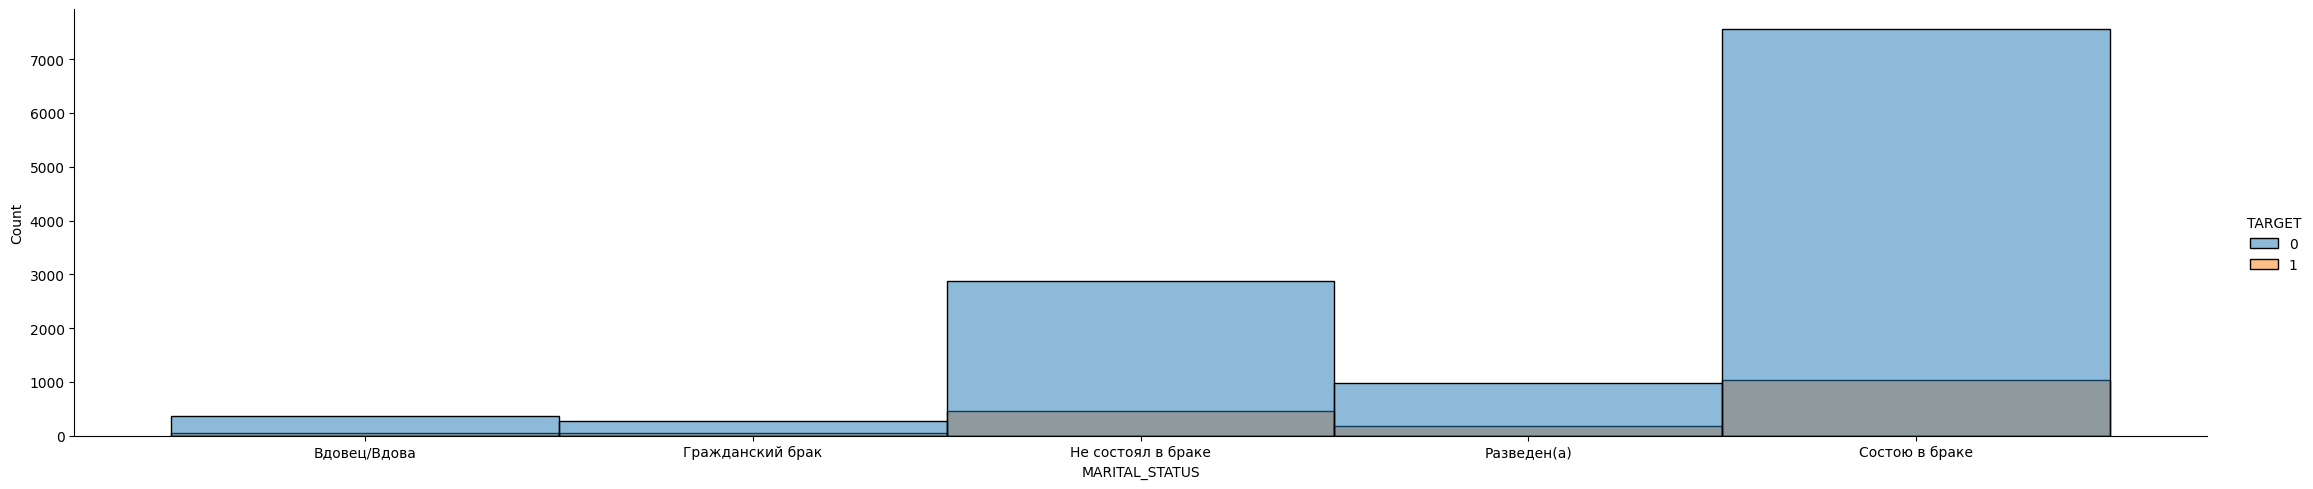

In [76]:
labels=['Состою в браке', 'Не состоял в браке', 'Разведён(-а)',
        'Вдовец/вдова', 'Гражданский брак']

title='Диаграмма семейного положения'

show_cat_feat('MARITAL_STATUS', labels, title, 4.5)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Состою в браке'),
  Text(1, 0, 'Гражданский брак'),
  Text(2, 0, 'Разведен(а)'),
  Text(3, 0, 'Не состоял в браке'),
  Text(4, 0, 'Вдовец/Вдова')])

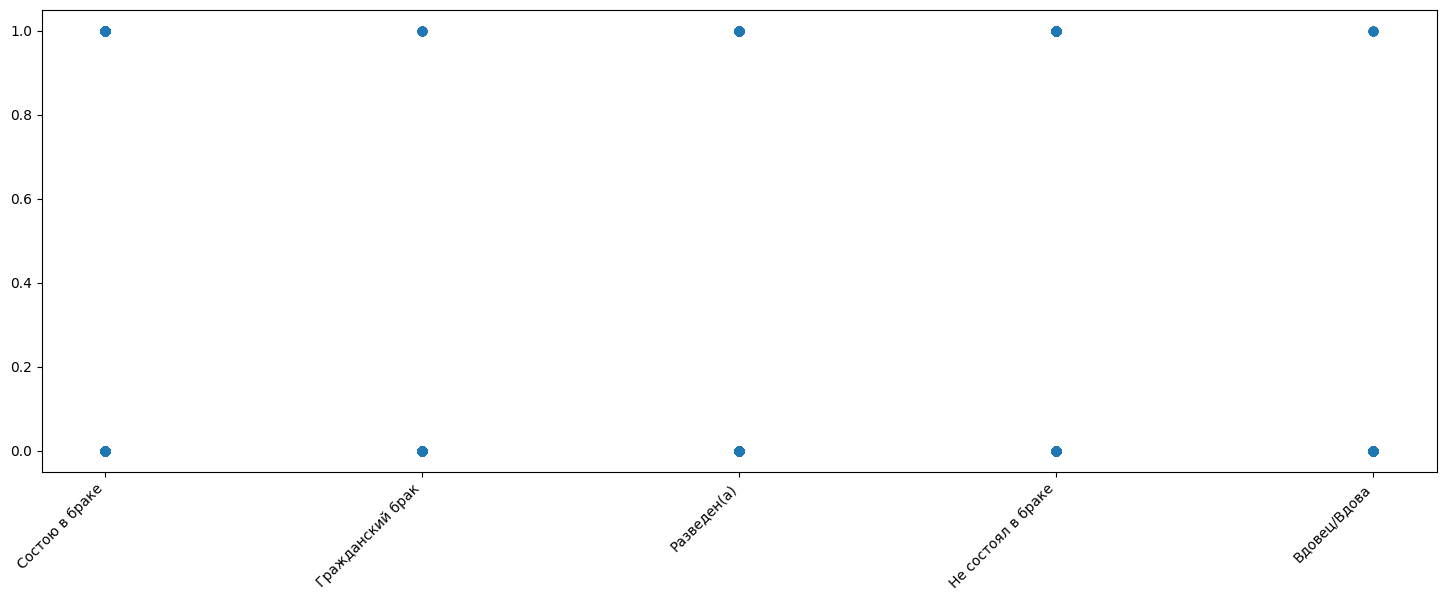

In [77]:
plt.subplots(figsize=(18, 6))
plt.scatter(all_data['MARITAL_STATUS'], all_data["TARGET"], alpha=0.2)
plt.xticks(rotation=45, ha='right')

### SOCSTATUS_WORK_FL

Наличие пропусков: False


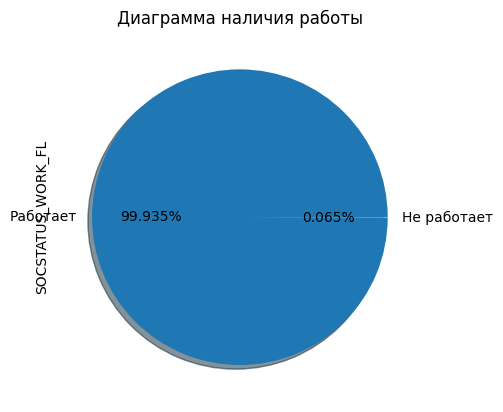

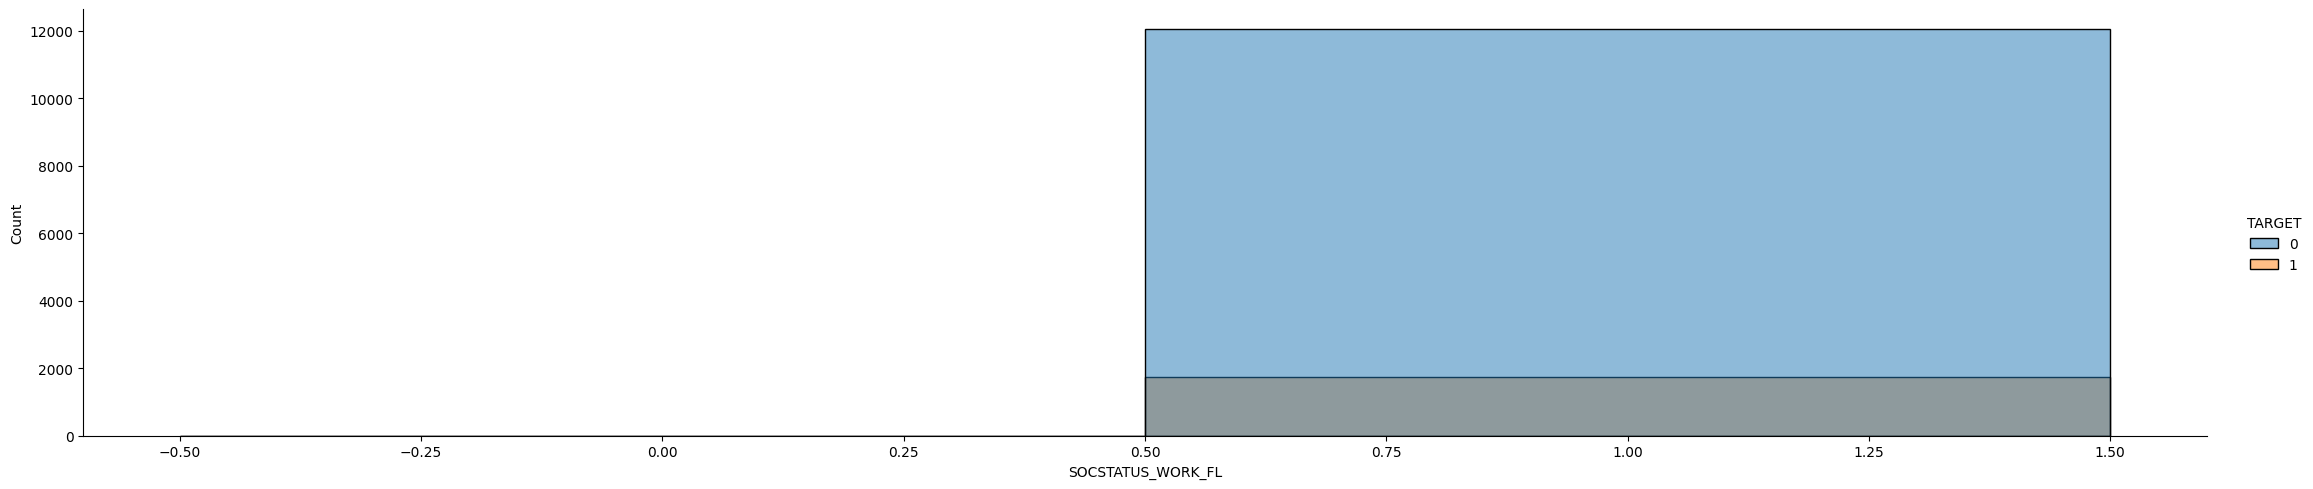

In [78]:
labels=['Работает', 'Не работает']
title='Диаграмма наличия работы'

show_cat_feat('SOCSTATUS_WORK_FL', labels, title, 4.5)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

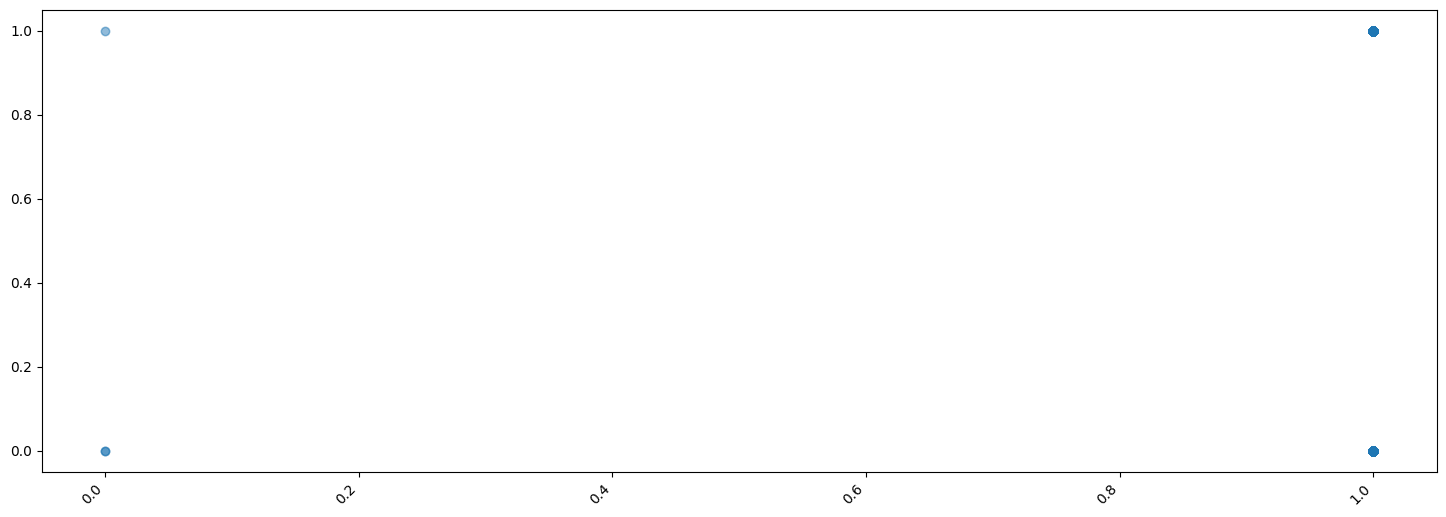

In [79]:
plt.subplots(figsize=(18, 6))
plt.scatter(all_data['SOCSTATUS_WORK_FL'], all_data["TARGET"], alpha=0.2)
plt.xticks(rotation=45, ha='right')

### SOCSTATUS_PENS_FL

Наличие пропусков: False


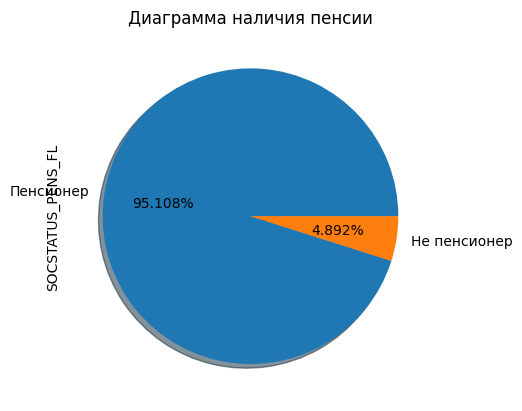

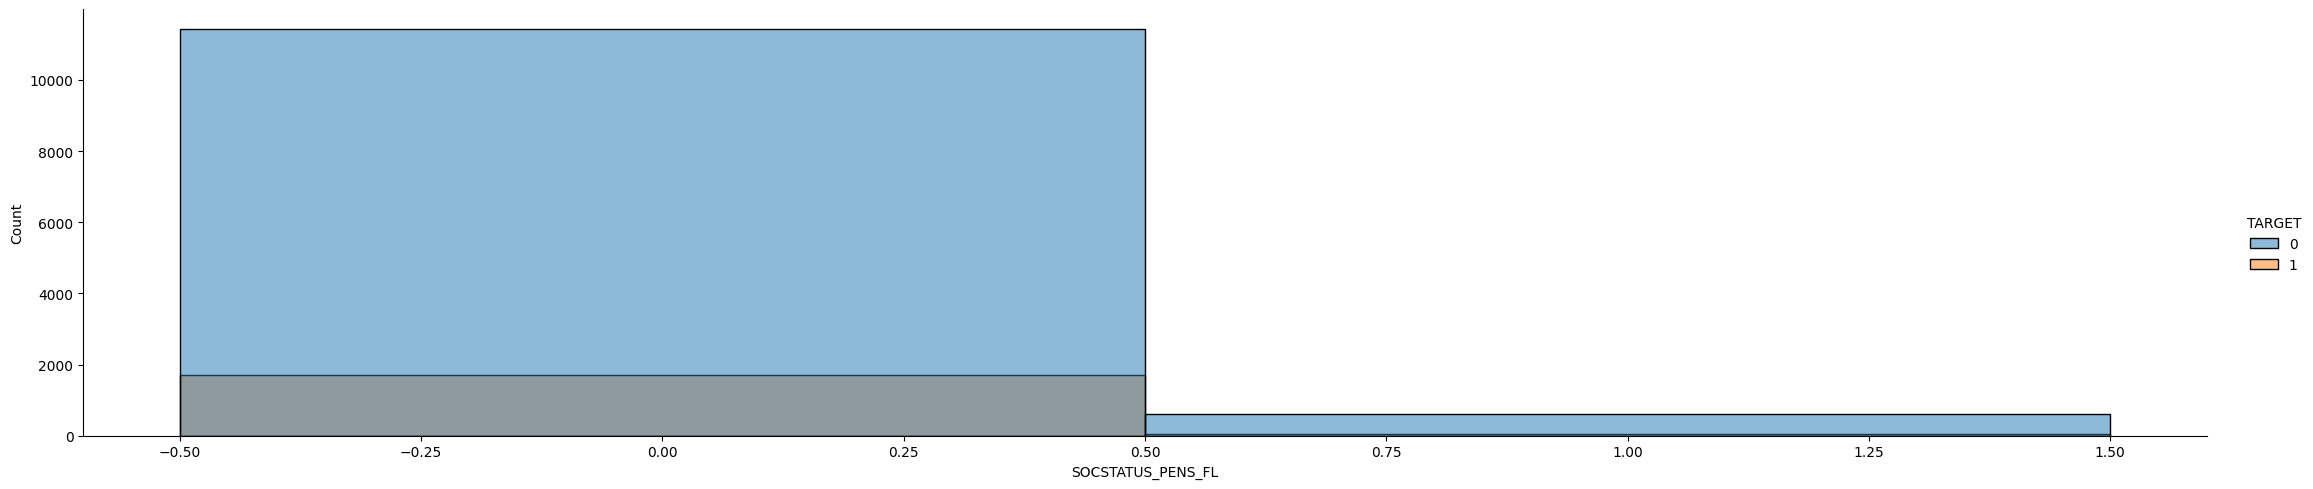

In [80]:
labels=['Пенсионер', 'Не пенсионер']
title='Диаграмма наличия пенсии'

show_cat_feat('SOCSTATUS_PENS_FL', labels, title, 4.5)

### FL_PRESENCE_FL

Наличие пропусков: False


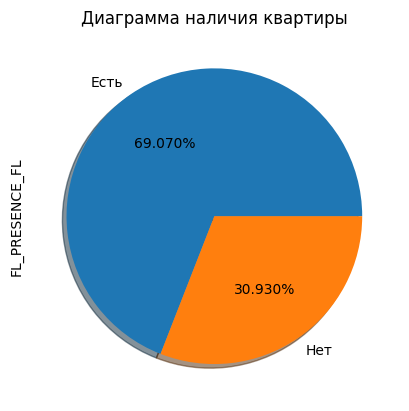

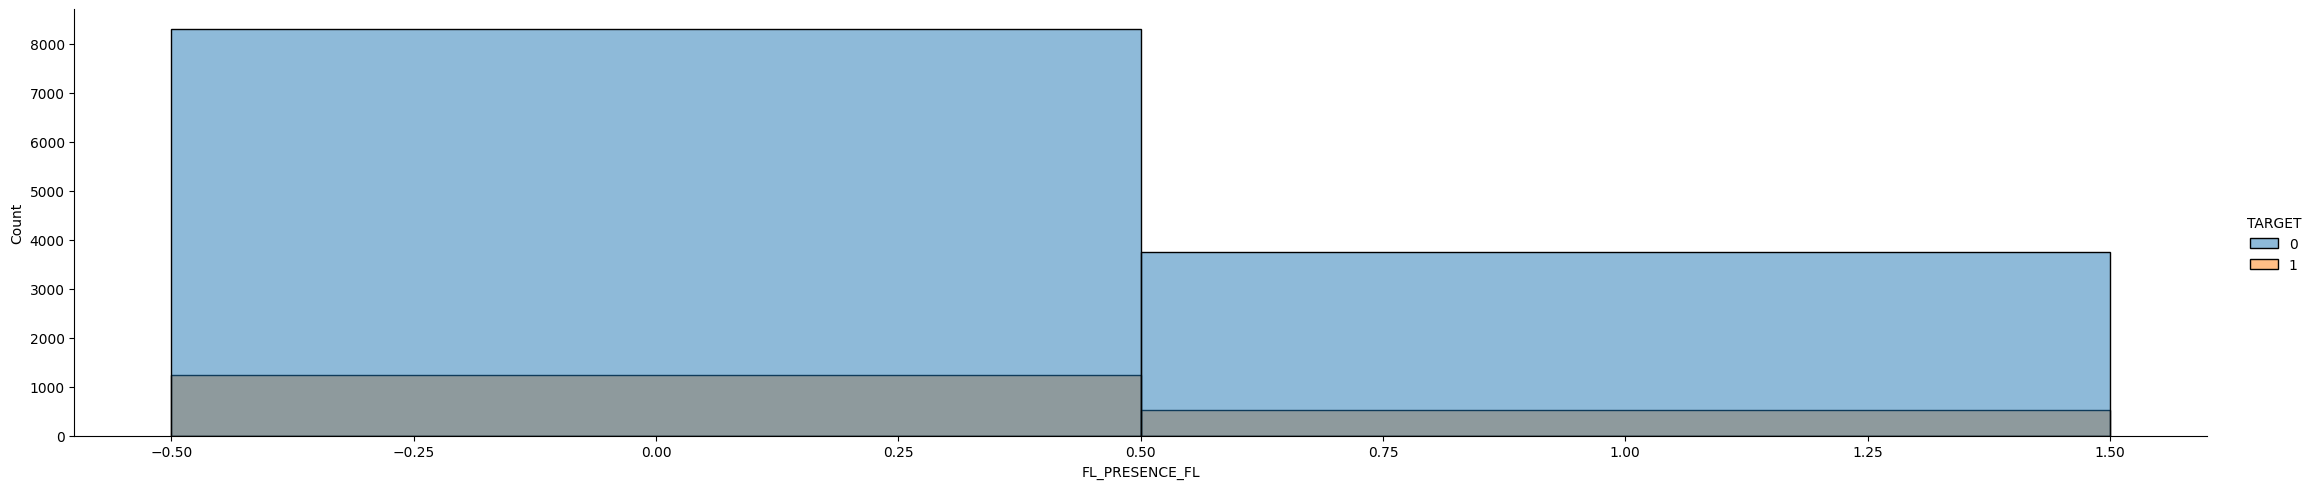

In [81]:
labels=['Есть', 'Нет']
title='Диаграмма наличия квартиры'

show_cat_feat('FL_PRESENCE_FL', labels, title, 4.5)

### GEN_INDUSTRY

Наличие пропусков: False


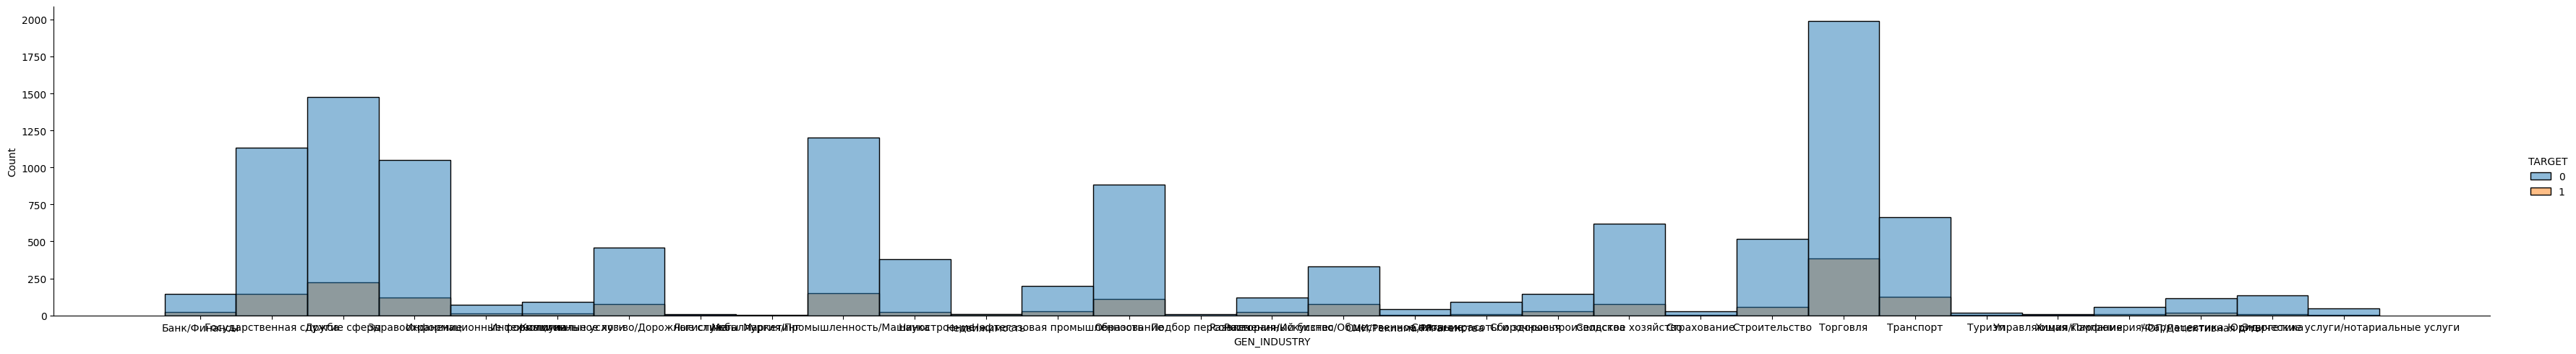

In [82]:
show_cat_feat('GEN_INDUSTRY', aspect=7, pie=False)

### GEN_TITLE

Наличие пропусков: False


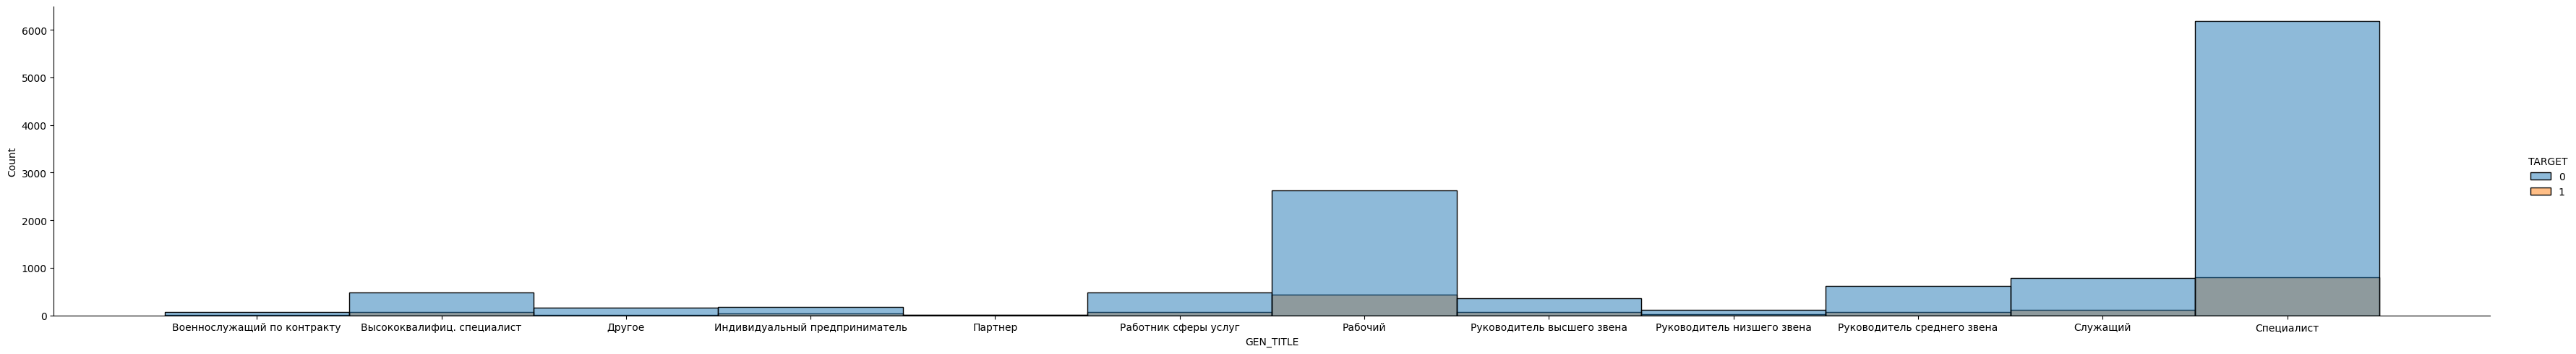

In [83]:
show_cat_feat('GEN_TITLE', aspect=7, pie=False)

### JOB_DIR

Наличие пропусков: False


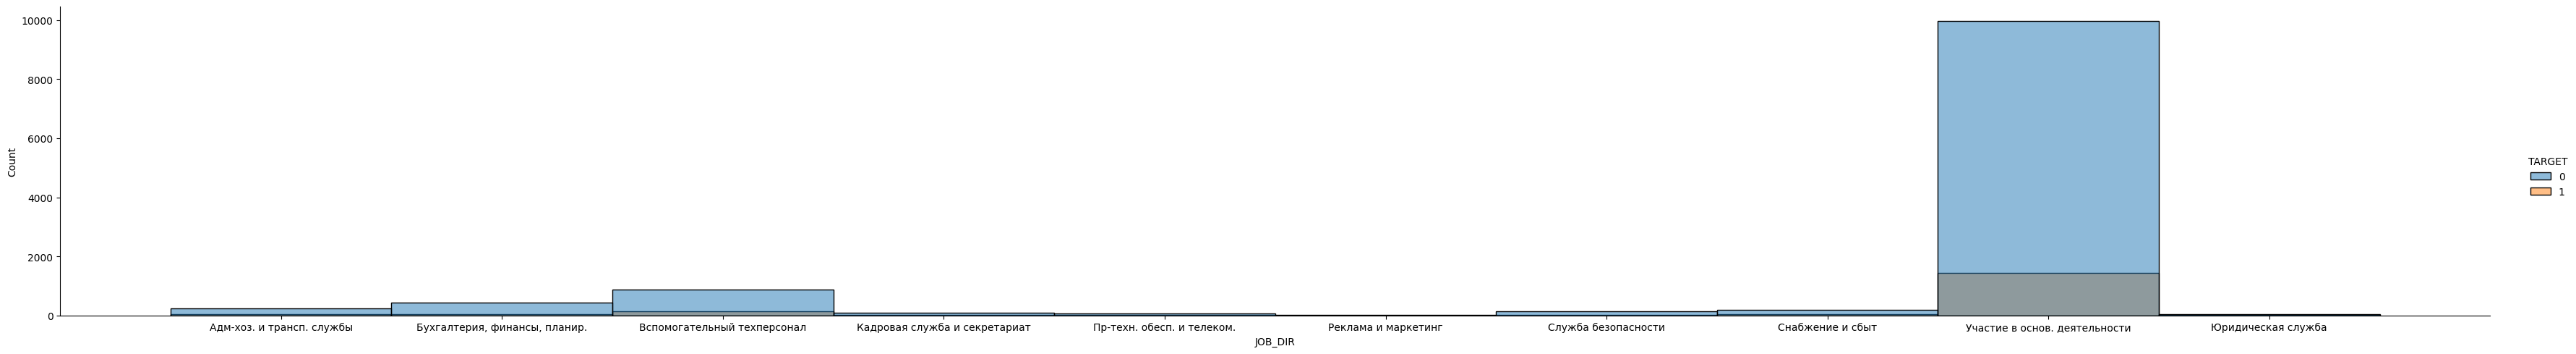

In [84]:
show_cat_feat('JOB_DIR', aspect=7, pie=False)

### FAMILY_INCOME

In [85]:
all_data['FAMILY_INCOME'].unique()

['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.']
Categories (5, object): ['до 5000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.',
                         'от 5000 до 10000 руб.', 'свыше 50000 руб.']

Наличие пропусков: False


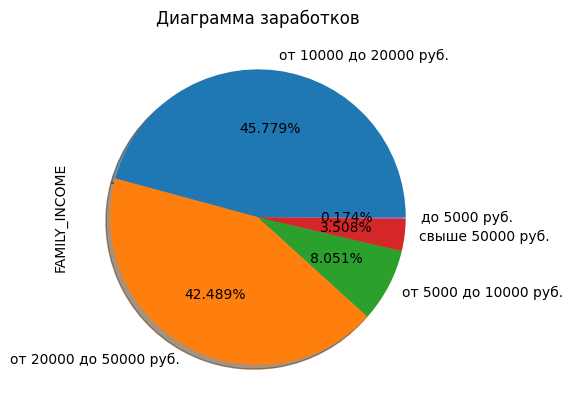

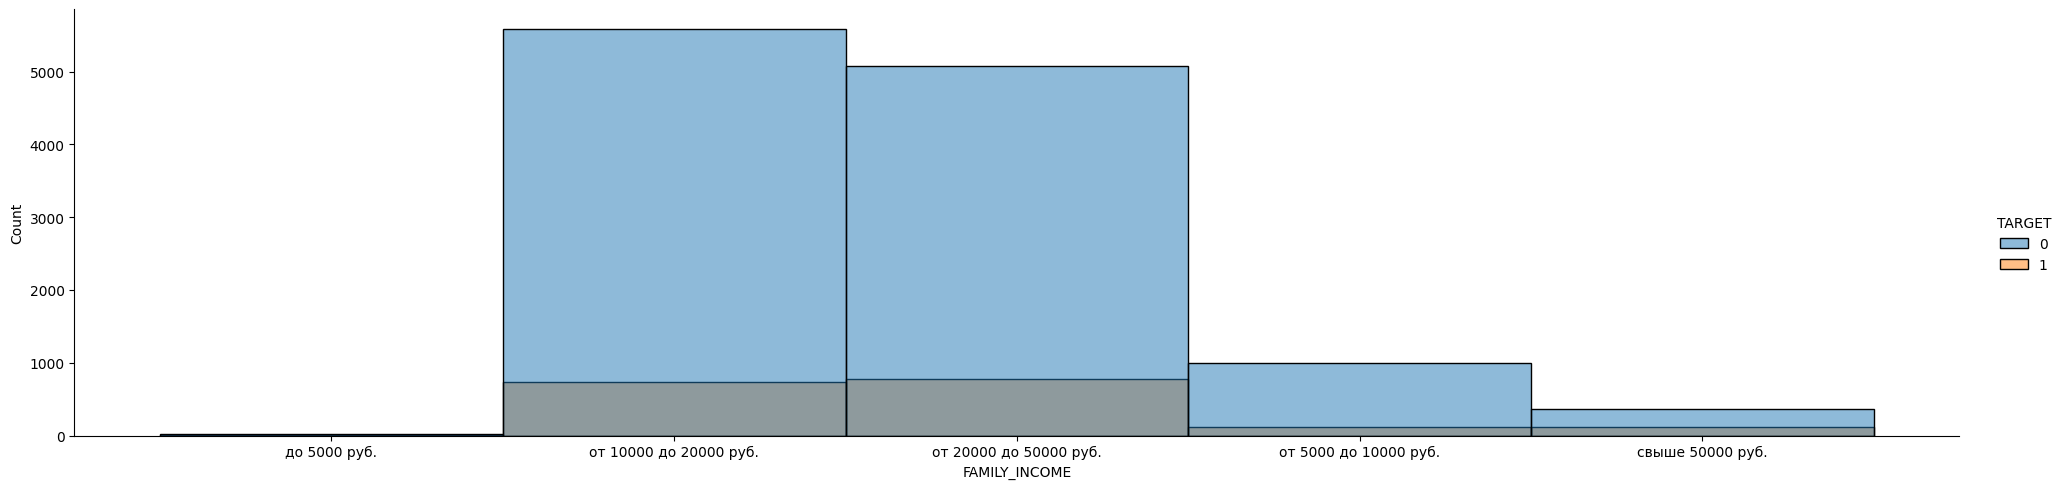

In [86]:
labels=['от 10000 до 20000 руб.',
        'от 20000 до 50000 руб.',
        'от 5000 до 10000 руб.',
        'свыше 50000 руб.',
        'до 5000 руб.']

title = 'Диаграмма заработков'

show_cat_feat('FAMILY_INCOME', labels, title, aspect=4)

### TERM

In [87]:
all_data["TERM"].unique()

[6, 12, 3, 10, 4, ..., 16, 20, 22, 19, 30]
Length: 22
Categories (22, int64): [3, 4, 5, 6, ..., 23, 24, 30, 36]

Наличие пропусков: False


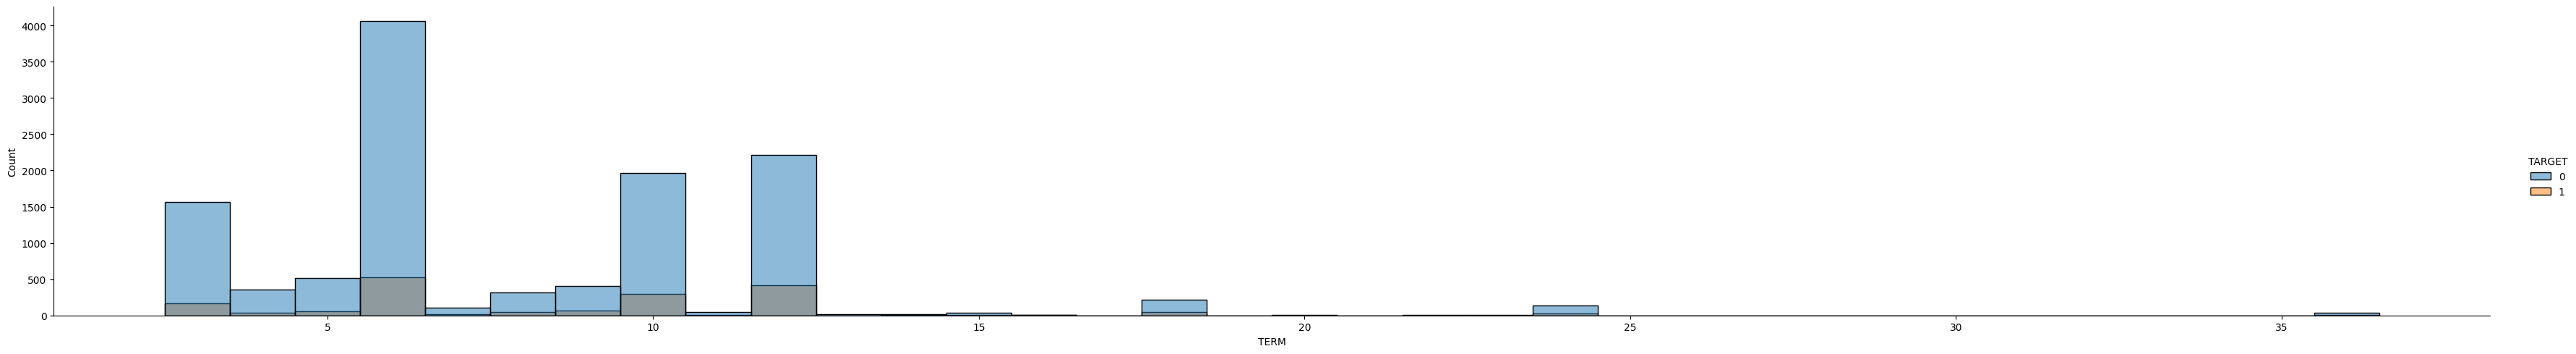

In [88]:
show_cat_feat('TERM', aspect=7, pie=False)

## Матрица корелляций

In [89]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 15522
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AGE                      13799 non-null  int64   
 1   GENDER                   13799 non-null  category
 2   EDUCATION                13799 non-null  category
 3   MARITAL_STATUS           13799 non-null  category
 4   CHILD_TOTAL              13799 non-null  int64   
 5   DEPENDANTS               13799 non-null  int64   
 6   SOCSTATUS_WORK_FL        13799 non-null  category
 7   SOCSTATUS_PENS_FL        13799 non-null  category
 8   REG_ADDRESS_PROVINCE     13799 non-null  category
 9   FACT_ADDRESS_PROVINCE    13799 non-null  category
 10  POSTAL_ADDRESS_PROVINCE  13799 non-null  category
 11  FL_PRESENCE_FL           13799 non-null  category
 12  OWN_AUTO                 13799 non-null  int64   
 13  GEN_INDUSTRY             13799 non-null  category
 14  GEN_TI

<ipython-input-90-1315bd4b9ee0>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(all_data.corr(


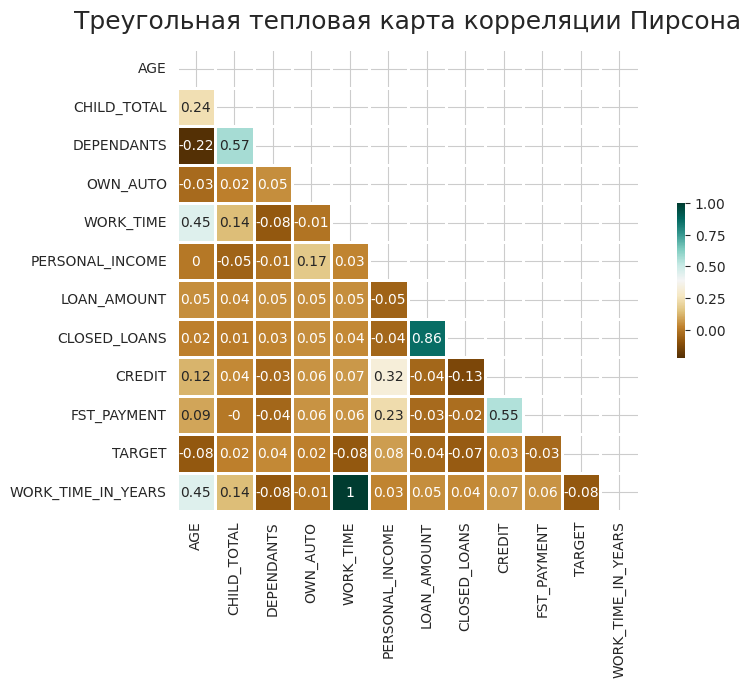

In [90]:
fig = plt.figure(figsize=(10,6))

sns.set_style("whitegrid")

# Воспользуемся функциями np.triu, чтобы изолировать верхний треугольник (np.tril нижний)
# функция np.ones_like() изменит все изолированные значения на 1.
mask = np.triu(np.ones_like(all_data.corr(
    # numeric_only=True
    ), dtype=bool))

heatmap = sns.heatmap(
    all_data.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=2,
    mask=mask,
)

heatmap.set_title("Треугольная тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=15);

## Целевая переменная

In [91]:
# sns.barplot(x = all_data["TARGET"].value_counts().index,
#             y = all_data["TARGET"].value_counts(),
#             data = all_data, saturation = 1).set(title = "Частота целевой переменной");

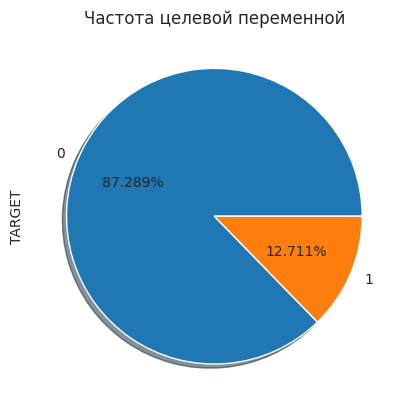

In [92]:
all_data['TARGET'].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True).set(title = "Частота целевой переменной");